# Exploring categorical variables

## Import data

In [14]:
import pandas as pd

ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "loans.csv"

df = pd.read_csv(ROOT + DATA)

df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,mortgage,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,rent,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,rent,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,rent,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,rent,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [29]:
df.homeownership = df.homeownership.astype("category")
df.application_type = df.application_type.astype("category")

## Contingency tables and bar plots

In [30]:
# contingency table for application type and homeownership.
pd.crosstab(df.application_type	, df.homeownership,  margins=True)

homeownership,mortgage,own,rent,All
application_type,,,,
individual,3839,1170,3496,8505
joint,950,183,362,1495
All,4789,1353,3858,10000


In [31]:
# A table summarizing the frequencies for each value of the homeownership variable: mortgage, own, and rent.
df["homeownership"].value_counts()

mortgage    4789
rent        3858
own         1353
Name: homeownership, dtype: int64

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", color_codes=True)

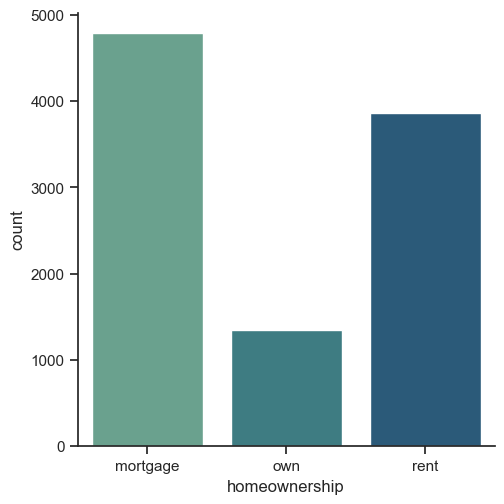

In [48]:
# Counts of values of the homeownership variable.
sns.catplot(x="homeownership",
            kind = "count",
            palette="crest",
            data=df)

plt.show();


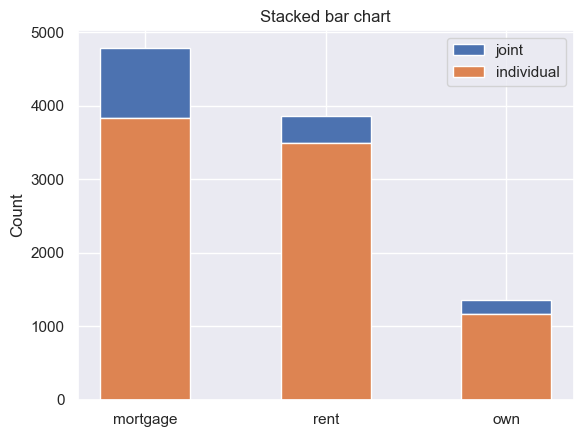

In [110]:
# Stacked bar chart

joint = df.homeownership[df.application_type=="joint"].value_counts() 
individual = df.homeownership[df.application_type=="individual"].value_counts() 
labels = list(df['homeownership'].value_counts().index)

width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, joint, width,  bottom=individual,
       label='joint')
ax.bar(labels, individual, width,  label='individual')


ax.set_ylabel('Count')
ax.set_title('Stacked bar chart')
ax.legend()

plt.show()

In [109]:
labels=list(df['homeownership'].value_counts().index)
labels



['mortgage', 'rent', 'own']

In [82]:
men_means = df.homeownership[df.application_type=="joint"] 
men_means

4           rent
6       mortgage
21      mortgage
32      mortgage
37      mortgage
          ...   
9981    mortgage
9984    mortgage
9987    mortgage
9991    mortgage
9997    mortgage
Name: homeownership, Length: 1495, dtype: category
Categories (3, object): ['mortgage', 'own', 'rent']

## Visualizing two categorical variables

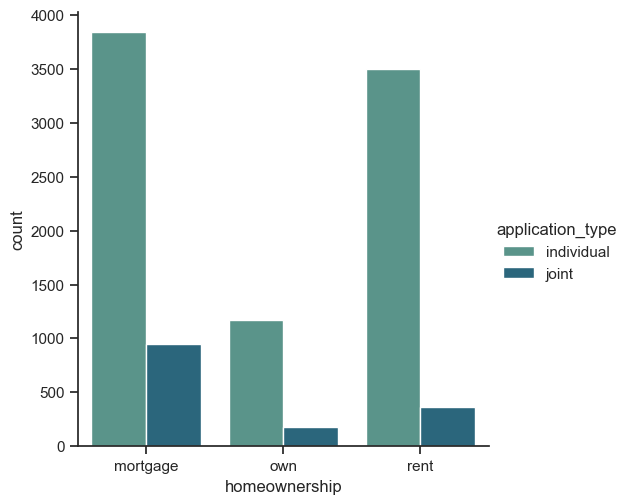

In [49]:
# Dodged bar plot
sns.catplot(x="homeownership",
            hue="application_type",
            kind = "count",
            palette="crest",
            data=df)

plt.show();

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

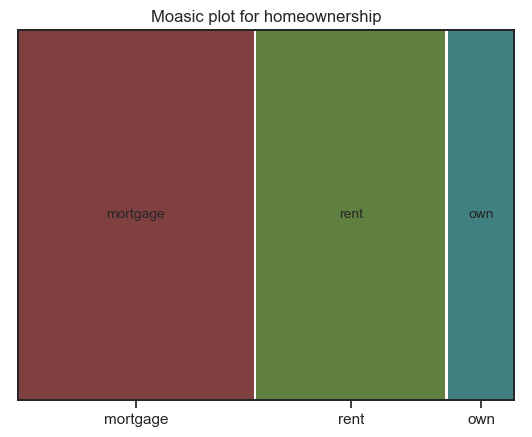

In [68]:
# Mosaic plot for homeownership alone
mosaic(df, ['homeownership'], title='Moasic plot for homeownership')
plt.show();

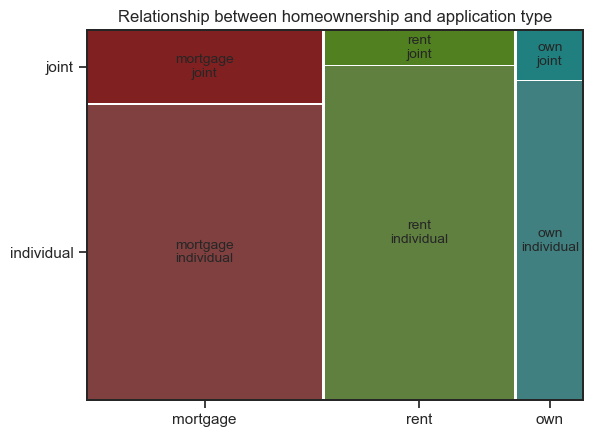

In [70]:
# Mosaic plot for displaying the relationship between homeownership and application type.
mosaic(df, ['homeownership', 'application_type'], title='Relationship between homeownership and application type')
plt.show();

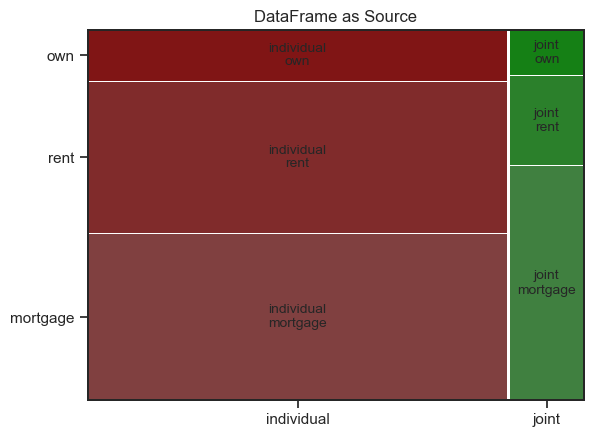

In [65]:
# Mosaic plot where loans are grouped by homeownership 
# after they have been divided into individual and joint application types.

mosaic(df, ['application_type', 'homeownership'], title='DataFrame as Source')
plt.show();